In [4]:
import nbimporter
import utilities
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

##### We are interested in calculating Travel Time, which is the time it takes from 'Enroute' to 'On Scene' for the firefighters.

In [2]:
d = {4 : 'Enroute', 5 : 'On Scene'}
table = utilities.getTimeDataset(d)

Opened database successfully
SQL QUERY = 
                        SELECT  I.incident_id, R.responderunit_id, T.responder_id,
                                T.timedesc_id, I.typenaturecode_id, I.fireblock, I.fmarespcomp,
                                T.realtime
                        FROM incident as I
                        INNER JOIN inctimes as T
                                ON I.incident_id = T.incident_id
                        INNER JOIN responder as R
                                ON ( I.incident_id = R.incident_id AND T.responder_id = R.responder_id)
                        WHERE T.timedesc_id IN (4, 5)
                                AND T.responder_id IS NOT NULL;
                        


In [5]:
# take a look at the results.
table.head(20)

timedesc_id                                                                      Enroute  \
incident_id responderunit_id typenaturecode_id fireblock fmarespcomp                       
754221      52               147.0             0375      03          2010-01-01 00:08:53   
            221              147.0             0375      03          2010-01-01 00:07:53   
754222      58               134.0             0727      07          2010-01-01 00:04:51   
            218              134.0             0727      07          2010-01-01 00:04:41   
754224      232              21.0              1109      11          2010-01-01 00:14:51   
            415              21.0              1109      11          2010-01-01 00:15:01   
754225      120              125.0             2530      25          2010-01-01 00:18:11   
            229              125.0             2530      25          2010-01-01 00:16:28   
754226      56               141.0             0133      01          2010-01-01 00:27:50   
            123              141.0             0133      01          2010-01-01 00:22:11   
            230              141.0             0133      01          2010-01-01 00:26:03   
754227      30               141.0             0109      01          2010-01-01 00:10:03   
            215              141.0             0109      01          2010-01-01 00:09:25   
754228      33               12.0              0127      01          2010-01-01 00:19:05   
            116              12.0              0127      01          2010-01-01 00:19:03   
754229      46               147.0             2530      25          2010-01-01 00:21:21   
            218              147.0             2530      25          2010-01-01 00:21:26   
            230              147.0             2530      25          2010-01-01 00:20:48   
754230      116              155.0             0127      01          2010-01-01 00:25:34   
754231      52               47.0              0360      03          2010-01-01 00:30:11   

timedesc_id                                                                     On Scene  
incident_id responderunit_id typenaturecode_id fireblock fmarespcomp                      
754221      52               147.0             0375      03                          NaT  
            221              147.0             0375      03          2010-01-01 00:09:53  
754222      58               134.0             0727      07          2010-01-01 00:08:57  
            218              134.0             0727      07          2010-01-01 00:07:14  
754224      232              21.0              1109      11          2010-01-01 00:17:01  
            415              21.0              1109      11          2010-01-01 00:17:36  
754225      120              125.0             2530      25                          NaT  
            229              125.0             2530      25          2010-01-01 00:26:53  
754226      56               141.0             0133      01          2010-01-01 00:27:50  
            123              141.0             0133      01          2010-01-01 00:22:56  
            230              141.0             0133      01          2010-01-01 00:30:27  
754227      30               141.0             0109      01          2010-01-01 00:17:39  
            215              141.0             0109      01          2010-01-01 00:19:38  
754228      33               12.0              0127      01                          NaT  
            116              12.0              0127      01          2010-01-01 00:23:24  
754229      46               147.0             2530      25          2010-01-01 00:25:06  
            218              147.0             2530      25                          NaT  
            230              147.0             2530      25                          NaT  
754230      116              155.0             0127      01          2010-01-01 00:25:34  
754231      52               47.0              0360      03     

In [6]:
table["difference"] = table['On Scene'].sub(table['Enroute'], axis = 0)
table["difference"].astype('timedelta64[s]')
table["TravelTimeMinutes"] = (table["difference"] / pd.Timedelta(minutes=1, seconds=0))
table.head(10)

timedesc_id                                                                      Enroute  \
incident_id responderunit_id typenaturecode_id fireblock fmarespcomp                       
754221      52               147.0             0375      03          2010-01-01 00:08:53   
            221              147.0             0375      03          2010-01-01 00:07:53   
754222      58               134.0             0727      07          2010-01-01 00:04:51   
            218              134.0             0727      07          2010-01-01 00:04:41   
754224      232              21.0              1109      11          2010-01-01 00:14:51   
            415              21.0              1109      11          2010-01-01 00:15:01   
754225      120              125.0             2530      25          2010-01-01 00:18:11   
            229              125.0             2530      25          2010-01-01 00:16:28   
754226      56               141.0             0133      01          2010-01-01 00:27:50   
            123              141.0             0133      01          2010-01-01 00:22:11   

timedesc_id                                                                     On Scene  \
incident_id responderunit_id typenaturecode_id fireblock fmarespcomp                       
754221      52               147.0             0375      03                          NaT   
            221              147.0             0375      03          2010-01-01 00:09:53   
754222      58               134.0             0727      07          2010-01-01 00:08:57   
            218              134.0             0727      07          2010-01-01 00:07:14   
754224      232              21.0              1109      11          2010-01-01 00:17:01   
            415              21.0              1109      11          2010-01-01 00:17:36   
754225      120              125.0             2530      25                          NaT   
            229              125.0             2530      25          2010-01-01 00:26:53   
754226      56               141.0             0133      01          2010-01-01 00:27:50   
            123              141.0             0133      01          2010-01-01 00:22:56   

timedesc_id                                                           difference  \
incident_id responderunit_id typenaturecode_id fireblock fmarespcomp               
754221      52               147.0             0375      03                  NaT   
            221              147.0             0375      03             00:02:00   
754222      58               134.0             0727      07             00:04:06   
            218              134.0             0727      07             00:02:33   
754224      232              21.0              1109      11             00:02:10   
            415              21.0              1109      11             00:02:35   
754225      120              125.0             2530      25                  NaT   
            229              125.0             2530      25             00:10:25   
754226      56               141.0             0133      01             00:00:00   
            123              141.0             0133      01             00:00:45   

timedesc_id                                                           TravelTimeMin  \
incident_id responderunit_id typenaturecode_id fireblock fmarespcomp                  
754221      52               147.0             0375      03                     NaN   
            221              147.0             0375      03                2.000000   
754222      58               134.0             0727      07                4.100000   
            218              134.0             0727      07                2.550000   
754224      232              21.0              1109      11                2.166667   
            415              21.0              1109      11                2.583333   
754225      120              125.0             2530      25                     NaN  

# Below, we look at median response Travel Times by FMA, Fireblock, and then by Responder ID.

/home/vagrant/miniconda3/envs/data-science/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


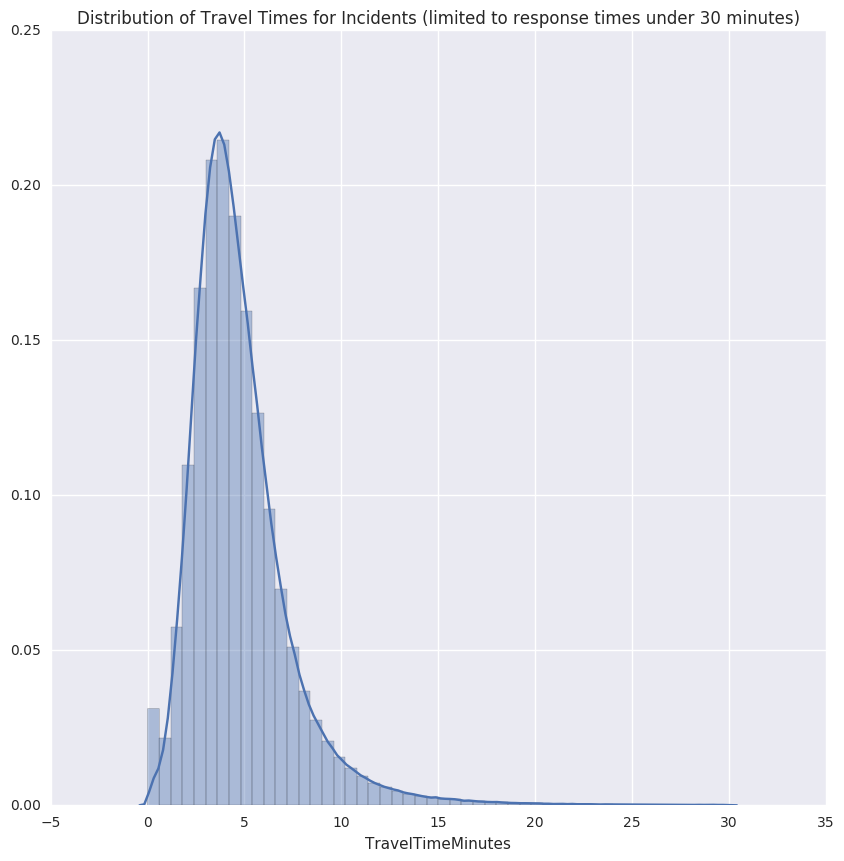

In [9]:
# keep only the travel times from 0 minutes to a day
table = table.loc[table['TravelTimeMinutes'] >= 0.0].loc[table['TravelTimeMinutes'] <= 1440] # less than a day
# zoom in on thirty minutes
plt.rcParams['figure.figsize']=(10,10)
sns.distplot(table.loc[table['TravelTimeMinutes'] <= 30]['TravelTimeMinutes']) 
plt.title('Distribution of Travel Times for Incidents (limited to response times under 30 minutes)')

In [11]:
# turn the FMA, Fireblock, and ResponderUnit ID into levels so we can group by them
table['fmarespcomp'] = table.index.get_level_values('fmarespcomp') 
table['fireblock'] = table.index.get_level_values('fireblock') 
table['responderunit_id'] = table.index.get_level_values('responderunit_id') 

# get rid of rows that do not have valid FMA values.
validFMAs = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10",
             "11", "12", "13", "14", "15", "16", "17", "18", "19", "20",
             "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"]
table = table[table['fmarespcomp'].isin(validFMAs)]

# get the Median response times for the Valid FMA's.
travelTimeFMA = table.groupby(['fmarespcomp'])['TravelTimeMinutes'].median()
travelTimeFireblock = table.groupby(['fireblock'])['TravelTimeMinutes'].median()
travelTimeResponderUnit = table.groupby(['responderunit_id'])['TravelTimeMinutes'].median()

In [12]:
travelTimeFMA.head(10)

fmarespcomp
01    3.683333
02    4.833333
03    3.900000
04    3.750000
05    5.250000
06    4.750000
07    4.183333
08    3.633333
09    4.166667
10    5.350000
Name: TravelTimeMinutes, dtype: float64

In [13]:
travelTimeFireblock.head(10)

fireblock
01      0.000000
0103    4.216667
0106    3.783333
0109    3.583333
0112    3.816667
0115    3.633333
0118    3.316667
0121    2.733333
0124    4.000000
0127    3.766667
Name: TravelTimeMinutes, dtype: float64

In [14]:
travelTimeResponderUnit.head(10)

responderunit_id
4     7.325000
7     6.116667
8     0.033333
9     4.216667
10    0.083333
12    5.483333
13    4.650000
14    0.000000
15    6.483333
19    0.000000
Name: TravelTimeMinutes, dtype: float64

In [15]:
# write the response times to csv's
travelTimeFMA.to_csv("responseTimeMetricsData/travelTimeFMA.csv")
travelTimeFireblock.to_csv("responseTimeMetricsData/travelTimeFireblock.csv")
travelTimeResponderUnit.to_csv("responseTimeMetricsData/travelTimeResponderUnit.csv")